# Cleaning data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np 
sns.set()

In [2]:
# get directory
os.getcwd()
os.chdir('C:\\Users\\Administrator\\PycharmProjects\\Pheonix Egg\\Wine Project')

In [3]:
#download data
wine = pd.read_csv('winequality-red.csv')
wine = wine.dropna()
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#check data
wine.info()
#Checking data whether there is any missing value in the data or not. 
#Apparently, there is no missing value for this data set. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [5]:
#drop duplicated data
wine = wine.drop_duplicates(keep = 'first')
wine.info()
#. I have found that there are some duplicated rows. 
#For the purpose of this experiment, we will treat the duplicated row as one. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [6]:
#get basic stat
wine.describe()
#checking outlier and missing value. So far, everything seems ok. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis (EDA)

# First EDA process: Looking for outlier. 

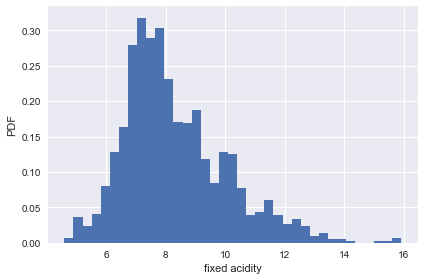

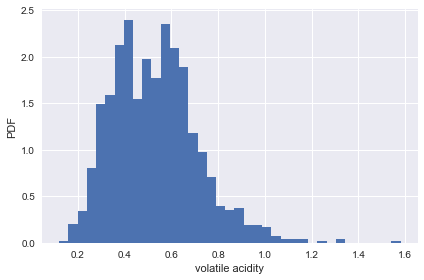

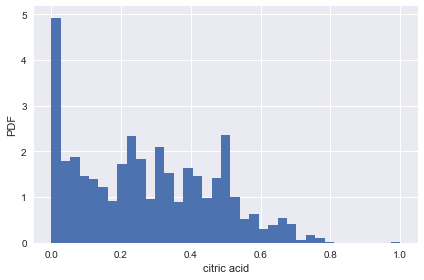

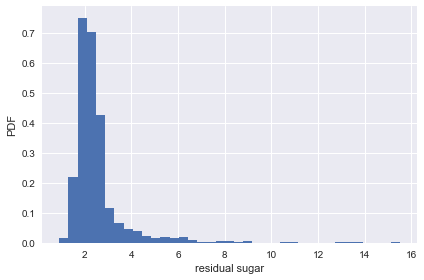

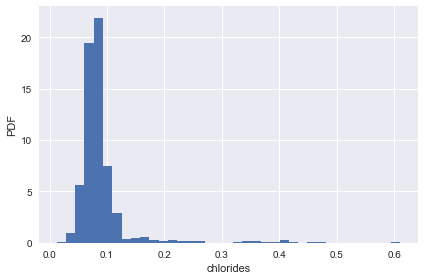

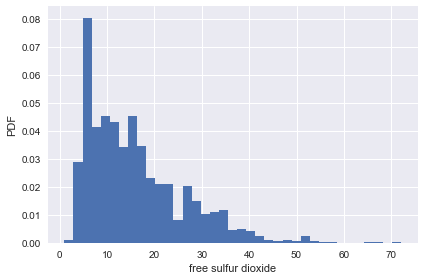

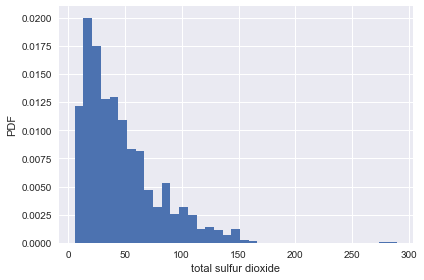

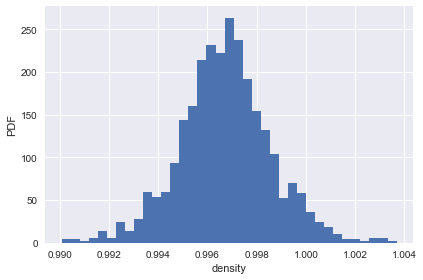

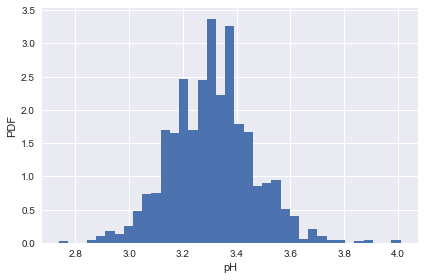

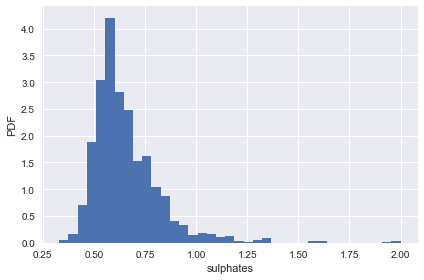

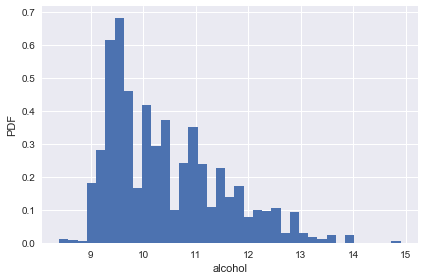

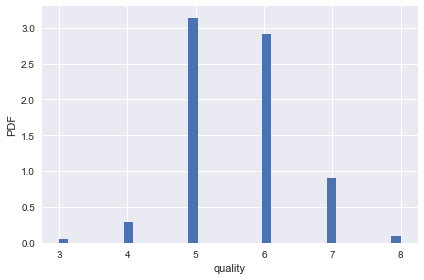

In [7]:
# ploting histogram to spot outlier vistually. 
for column in wine.columns: 
    _ = plt.hist(wine[column], bins=37, normed=True)
    _ = plt.xlabel(column)
    _ = plt.ylabel('PDF')
    plt.tight_layout()
    plt.show()

Each histogram seems normal with some extreme value, but they are still actceptable according to the meaning of parameters. For example, total sulfur dioxide level of 270 is still possible, even though the level is almost triple the mean of the feature. Therefore, after plotting histogram, we can conclue that there is no outlier. Second, virtually checking, most feature is not normally distributed. 
 

# Is there any correlationship betweeen physicochemical properties and rating ? 

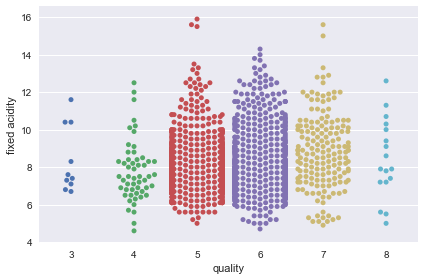

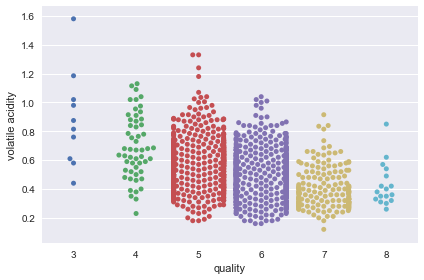

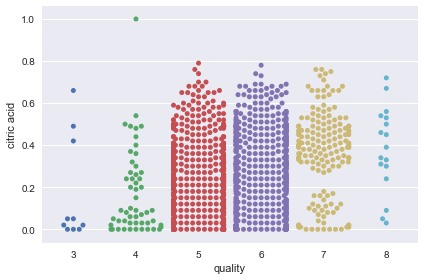

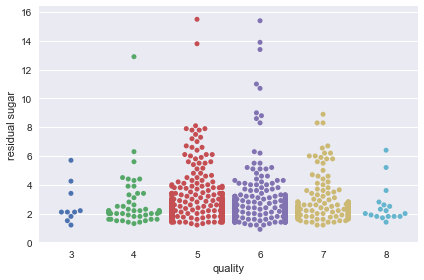

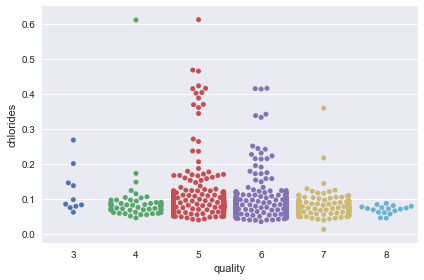

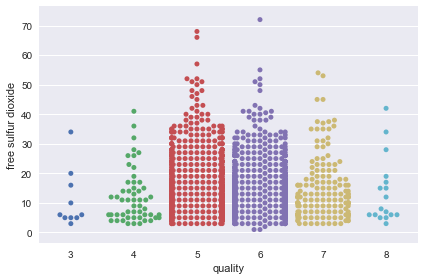

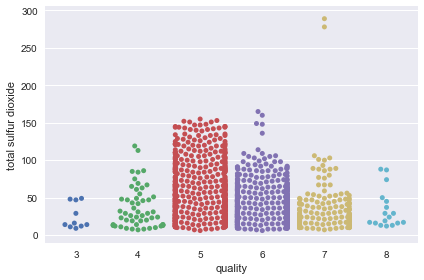

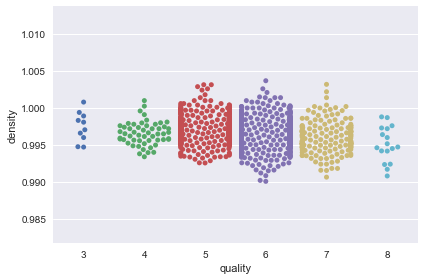

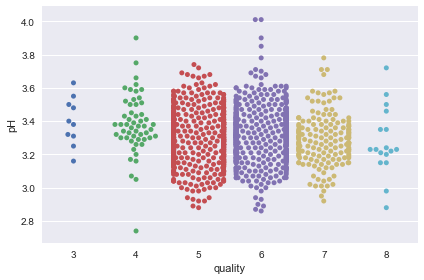

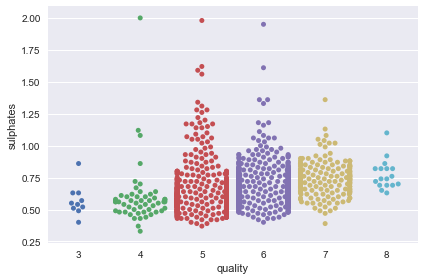

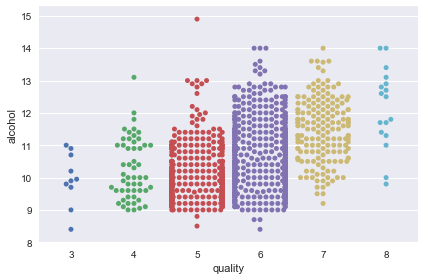

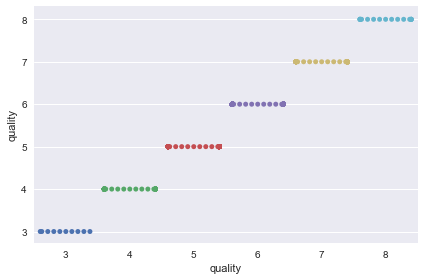

In [9]:
for column in wine.columns: 
    _ = sns.swarmplot(x="quality", y= column, data=wine)
    _ = plt.xlabel('quality')
    _ = plt.ylabel(column)
    plt.tight_layout()
    plt.show()

Looking the graphs virtually, some features have a relationship with quality such as alcohol, volatile acidity, residual sugar, sulphates, etc. we will discover the degree of correlation in the following graph. 


# discovering correlation between variable

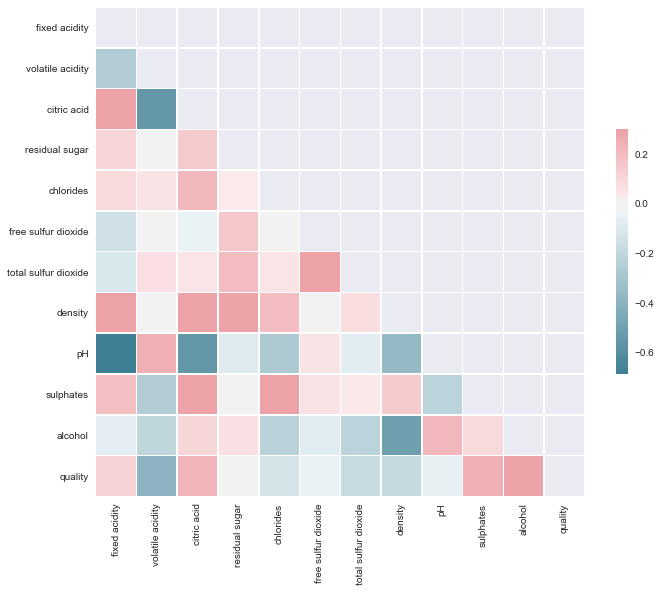

In [10]:
corr = wine.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


Variables that have correlation more than 0.15 are volatile acidity,citric acid,total sulfur dioxide,density,sulphates, and alcohol. For convenient, we will categorize these features to have a direct effect to wine quality. However, for other variables, the correlation between them and wine quality is weak, but they have a relationship with the direct effect features. For example, pH is strongly related with acid properties (0.67, 0.25,-0.55). Also, density is strongly related with alcohol (-0.5). we will plot the scatter plot to show the correlation below by quality level.   

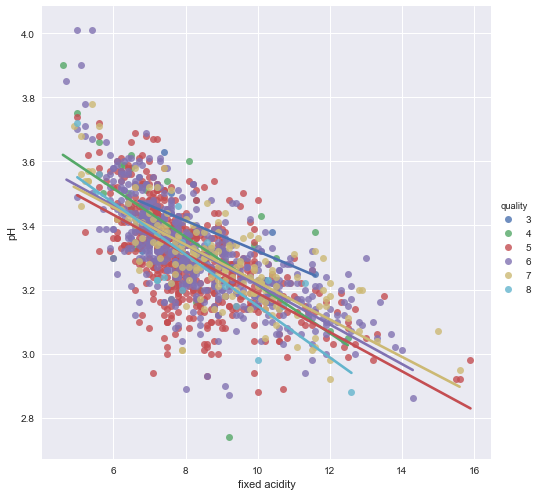

In [12]:
g = sns.lmplot(x="fixed acidity", y="pH", hue="quality",
               truncate=True, size=7, data=wine, ci = 0)
g.set_axis_labels("fixed acidity", "pH")
with sns.color_palette("PuBuGn_d") :
    plt.show()

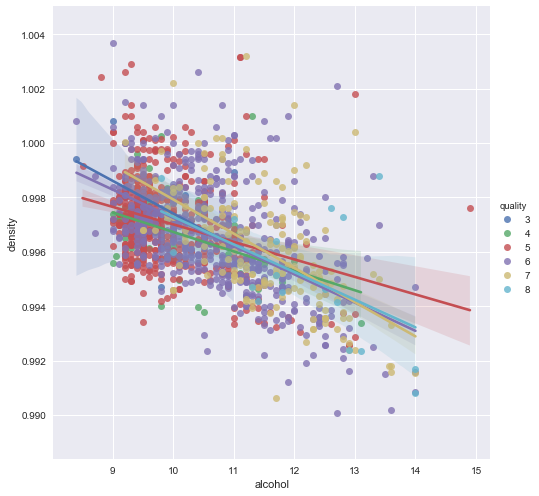

In [27]:
g = sns.lmplot(x="alcohol", y="density", hue="quality",
               truncate=True, size=7, data=wine)
g.set_axis_labels("alcohol", "density")
plt.show()

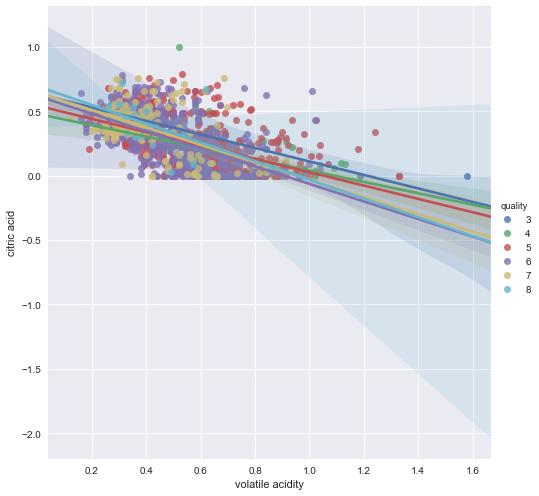

In [28]:
g = sns.lmplot(x="volatile acidity", y="citric acid",hue="quality",
                size=7, data=wine )
g.set_axis_labels("volatile acidity", "citric acid")
plt.show()

According to the graphs, for each quality level, the behavior of feature is the same among different features. For example, 
the slope of correlation between fixed acidity and pH is negative no matter what quality level it is. The same behaviur happen
in other scatter plot that we illustrated too. Therefore, To make it easier for applying logistic regression to our data. We decide
to create other variable called rating. The wine quality will be splited into two catagories zero and one. Zero parameter represents
lower quality of wine range from 3 to 5. One parameter represents 6 to 8 quality rating. By doing this, we can apply logistic regression
directly to the data. We will talk about the reason of using logistic regression in the next procedure. 

# create new variable (rating)

In [14]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


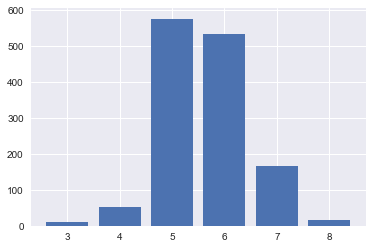

In [15]:
x=wine.quality.unique()
y= wine.quality.value_counts()
plt.bar(x,y)
plt.show()

In [16]:
wine['rating'] = wine.quality[wine.quality >= 6]
wine['rating'] = wine['rating'].replace((6,7,8),1)
wine['rating'] = wine['rating'].replace(np.nan,0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0.0


# Is the relationship betweeen physicochemical properties and rating still the same after creating new dependent variable ?

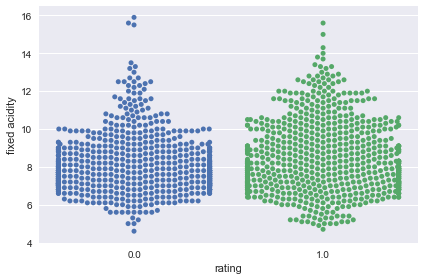

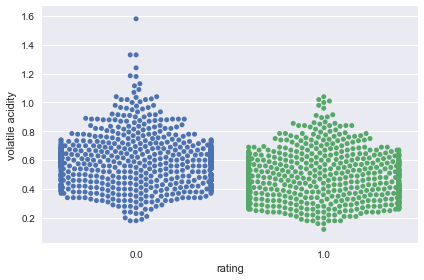

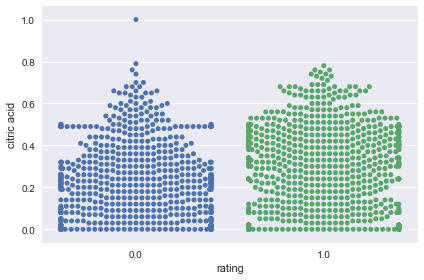

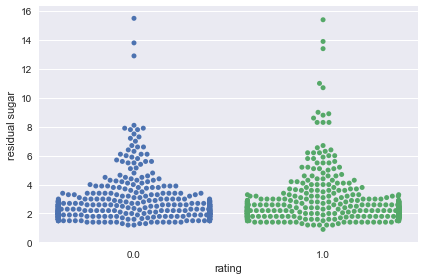

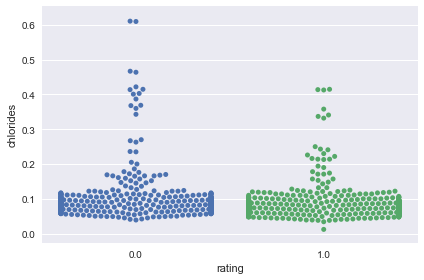

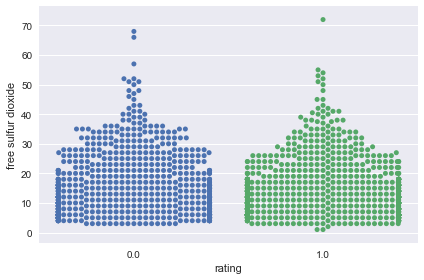

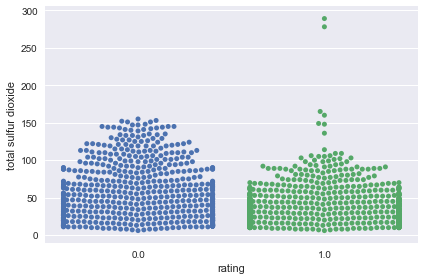

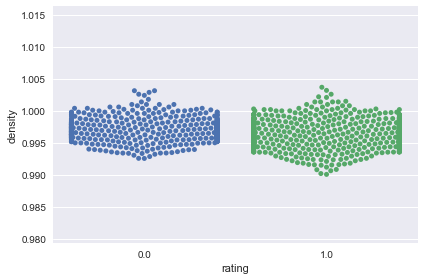

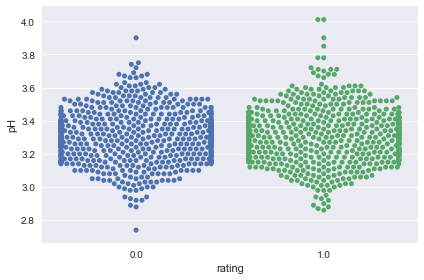

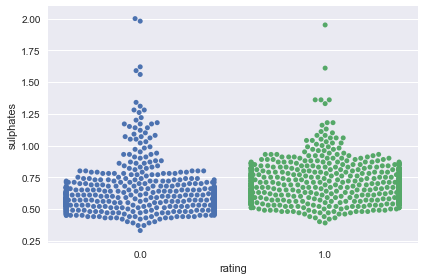

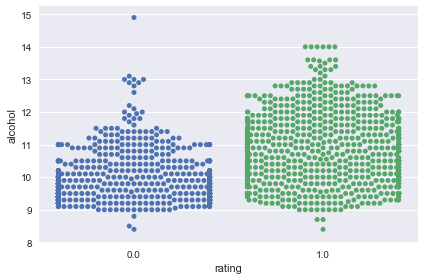

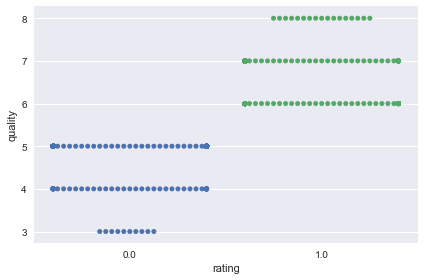

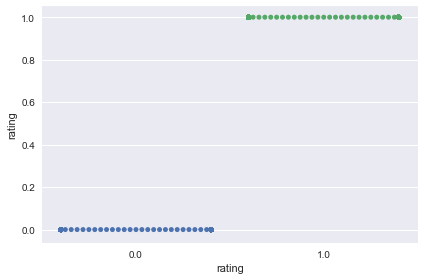

In [17]:
for column in wine.columns: 
    _ = sns.swarmplot(x="rating", y= column, data=wine)
    _ = plt.xlabel('rating')
    _ = plt.ylabel(column)
    plt.tight_layout()
    plt.show()

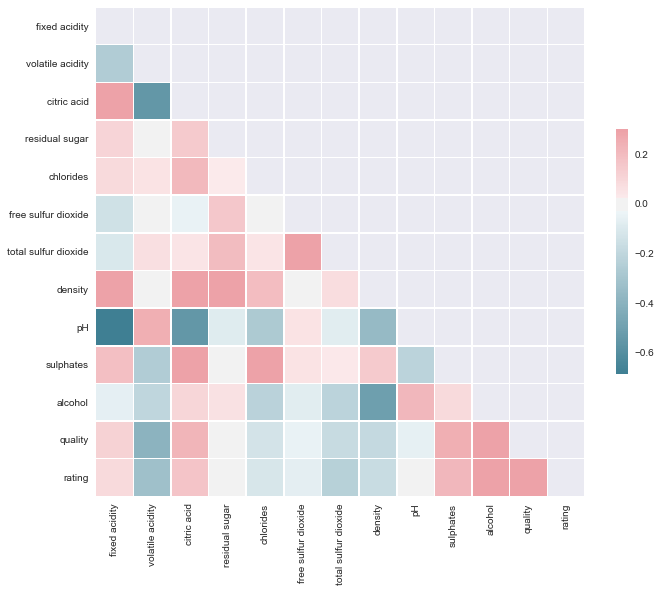

In [18]:
corr = wine.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024,0.091761
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214,-0.327195
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057,0.167903
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640,-0.002371
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988,-0.115071
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463,-0.069207
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855,-0.235046
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252,-0.168958
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245,0.004693
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835,0.211365


According to the results, the degree of relationship is somehow weaker than using original variable, but the direction of relationship
remain the same. Therefore, in the regression procedure, we will use rating variable instant of quality variable. 

# Inferential Statistics 
After we create new variable 'Rating'. We seperate wine into two catagories which have more than 5 rating and which have less than 5.
We will refer them as good wine and bad wine in the following procedure. Then, we try to run some test related to independence variables. 
The variables that have direct effect on rating are volatile acidity,citric acid,total sulfur dioxide,density,sulphates, and alcohol.
Our test will be consist of two step : 
    * plotting ecdf of each group to see whether the distribution of each group (good wine, bad wine) is the same or not 
    * using bootstrapping method to test if there is any significant difference in mean of feature between bad wine and good wine 


In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

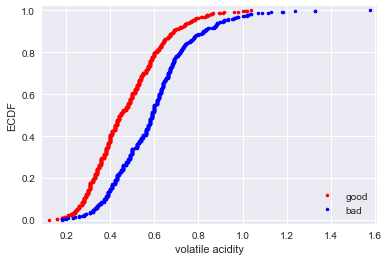

p-value = 1.0


In [21]:
# test good wine and bad wine samples on volatile acidity 
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['volatile acidity'])-np.mean(bad_wine['volatile acidity'])
x_1, y_1 = ecdf(good_wine['volatile acidity'])
x_2, y_2 = ecdf(bad_wine['volatile acidity'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')
plt.margins(0.02)
_ = plt.xlabel('volatile acidity')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['volatile acidity'],bad_wine['volatile acidity'])
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(wine['volatile acidity'], size=len(wine['volatile acidity']))
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['volatile acidity'])],
                                     bs_sample[len(good_wine['volatile acidity']):])
p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

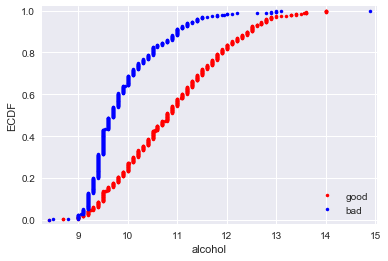

p-value = 0.0


In [22]:
# test good wine and bad wine samples on alcohol
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['alcohol'])-np.mean(bad_wine['alcohol'])

x_1, y_1 = ecdf(good_wine['alcohol'])
x_2, y_2 = ecdf(bad_wine['alcohol'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('alcohol')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['alcohol'],bad_wine['alcohol'])
bs_replicates = np.empty(10000)
for i in range(10000):
    
    bs_sample = np.random.choice(wine['alcohol'], size=len(wine['alcohol']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['alcohol'])],
                                     bs_sample[len(good_wine['alcohol']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

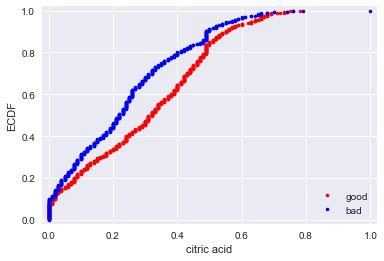

p-value = 0.0


In [23]:
# test good wine and bad wine samples on citric acid 
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['citric acid'])-np.mean(bad_wine['citric acid'])

x_1, y_1 = ecdf(good_wine['citric acid'])
x_2, y_2 = ecdf(bad_wine['citric acid'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('citric acid')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['citric acid'],bad_wine['citric acid'])
bs_replicates = np.empty(10000)
for i in range(10000):
    
    bs_sample = np.random.choice(wine['citric acid'], size=len(wine['citric acid']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['citric acid'])],
                                     bs_sample[len(good_wine['citric acid']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

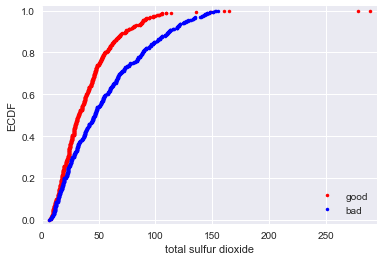

p-value = 1.0


In [24]:
# test good wine and bad wine samples on total sulfur dioxide

good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['total sulfur dioxide'])-np.mean(bad_wine['total sulfur dioxide'])

x_1, y_1 = ecdf(good_wine['total sulfur dioxide'])
x_2, y_2 = ecdf(bad_wine['total sulfur dioxide'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('total sulfur dioxide')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['total sulfur dioxide'],bad_wine['total sulfur dioxide'])
bs_replicates = np.empty(10000)
for i in range(10000):
   
    bs_sample = np.random.choice(wine['total sulfur dioxide'], size=len(wine['pH']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['total sulfur dioxide'])],
                                     bs_sample[len(good_wine['total sulfur dioxide']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

AS we can see from the results, all test that we conduct by using boothstraping method has significant result meaning that the mean of each feature of each group
is statistically significant. However, we want to dig deeper on every feature.  

# What is the result of testing mean of every feature of good wine and bad wine? 

in this section, we will use t-test as we do not know the distribution of each feature. Moreover, it will be much faster and 
easier to use t-test to test on a lot of feature. 

In [25]:
from scipy import stats
for column in wine.columns:  
    diff_mean_results = stats.ttest_ind(good_wine[column],bad_wine[column],equal_var = False)
    print(column , diff_mean_results)
# only residual sugar, pH that fail to reject the test 

fixed acidity Ttest_indResult(statistic=3.429690129057006, pvalue=0.0006224652259994661)
volatile acidity Ttest_indResult(statistic=-12.663112642586356, pvalue=1.0270784781602082e-34)
citric acid Ttest_indResult(statistic=6.301952761680176, pvalue=3.966613371490847e-10)
residual sugar Ttest_indResult(statistic=-0.08743750672371305, pvalue=0.9303367824350479)
chlorides Ttest_indResult(statistic=-4.175824466776456, pvalue=3.203283265747779e-05)
free sulfur dioxide Ttest_indResult(statistic=-2.5432543553431044, pvalue=0.011097105019784335)
total sulfur dioxide Ttest_indResult(statistic=-8.766046924165353, pvalue=6.337983150190238e-18)
density Ttest_indResult(statistic=-6.403466171052481, pvalue=2.098721635166707e-10)
pH Ttest_indResult(statistic=0.17297062036867633, pvalue=0.8627006248387413)
sulphates Ttest_indResult(statistic=7.888647833741197, pvalue=6.597118478126576e-15)
alcohol Ttest_indResult(statistic=18.742690953986735, pvalue=1.8012380348945214e-69)
quality Ttest_indResult(stati

From the results, only residual suger and pH fail to reject the test which means that the difference in mean of thoes features 
is not statistically significant. To sum up, after using ecdf , bootstraping, and t-test, the difference of mean of features between good wine and bad wine 
is statistically significant. Only two variables (residual suger and pH) is not statistically significant. 